In [54]:
import numpy as np
from matplotlib import pyplot as plt
from random import random
from math import erf, sqrt, log, pi, exp

from numba import jit

In [29]:
n = 10000
x_0 = 10
x_axis = np.linspace(0, n-1, n)

In [55]:
@jit
def generate(a, c, m, x_tab):
    for i in range(1,n):
        x_tab[i] = (a*x_tab[i-1] + c) % m

## Zadanie 1 - a

In [11]:
a = 123
c = 1
m = np.power(2, 15)

x_tab_1 = np.zeros(n)
x_tab_1[0] = x_0
generate(a, c, m, x_tab_1)

for i in range(0,n):
    x_tab_1[i] /= (m+1)

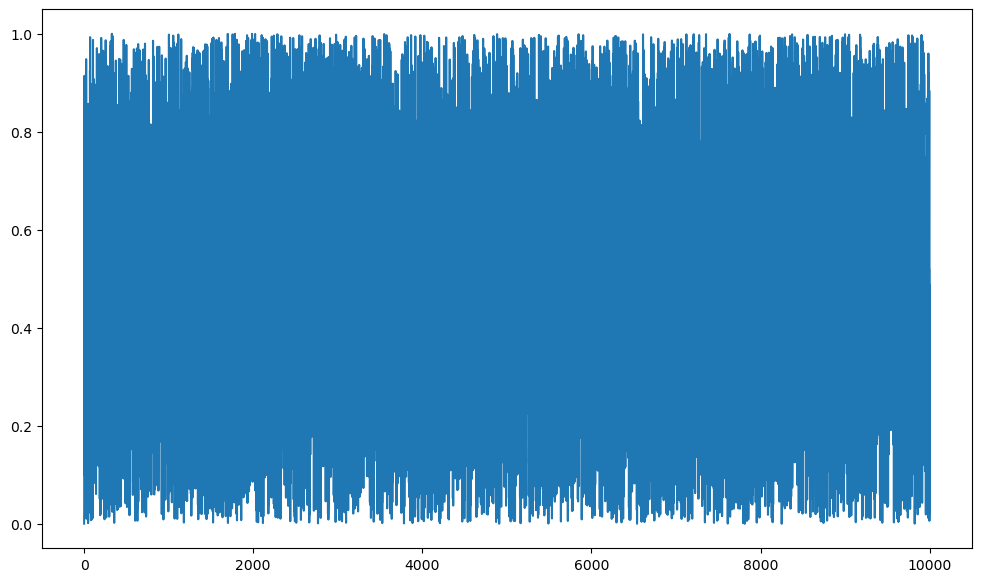

In [18]:
plt.figure(figsize=(12, 7))
plt.plot(x_axis, x_tab_1)
plt.show()

## Zadanie 1 - b

In [13]:
a = 69069
c = 1
m = np.power(2, 32)

x_tab_2 = np.zeros(n)
x_tab_2[0] = x_0
generate(a, c, m, x_tab_2)

for i in range(0,n):
    x_tab_2[i] /= (m+1)

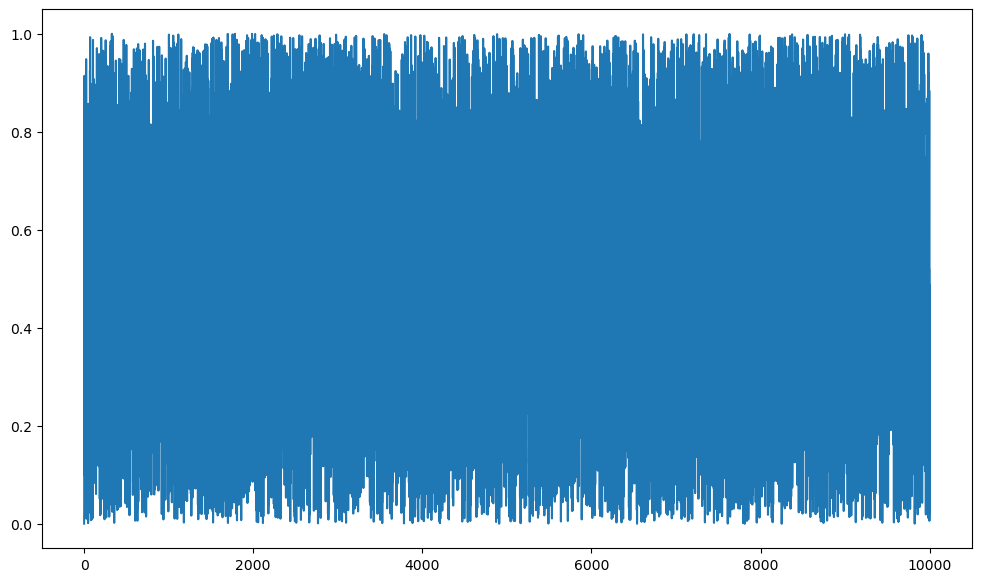

In [19]:
plt.figure(figsize=(12, 7))
plt.plot(x_axis, x_tab_1)
plt.show()

## Zadanie 2

In [34]:
def dist_erf(x):
    return 0.5*(1 + erf(x))

In [28]:
# def Box_Muller(X):
#     X = np.zeros(n)
#     for i in range(0, n):
#         X[i] = sqrt(-2*log(1-x_tab_2[i])) * 
#     return 

# void Box_Muller(std::vector<double> &X, std::vector<double> &Y){
#     for(int i = 0; i < n; ++i){
#         double U1 = uniform();
#         double U2 = uniform();
#         X[i] = std::sqrt(-2 * std::log(1 - U1)) * std::cos(2 * M_PI * U2);
#         Y[i] = std::sqrt(-2 * std::log(1 - U1)) * std::sin(2 * M_PI * U2);
#     }
# }

# void Circle_Norm(std::vector<double> &X, std::vector<double> &Y){
#     for(int i = 0; i < n; ++i){
#         double U1 = uniform();

#         X[i] *= std::sqrt(U1);
#         Y[i] *= std::sqrt(U1);
#     }
# }

In [32]:
# random() - losuje liczbe losowa z zakresu 0-1

def normal_dist(x, mi, sigma):
    return exp(-np.power((x-mi), 2) / (2*sigma*sigma)) / (sigma*sqrt(2*pi))

In [57]:
# random.randint(0, 9)
n = 10000000 #10^7
x_normal_tab = np.zeros(n)
x_finit = np.zeros(n)
mu = 0.2
sigma = 0.5

generate(a, c, m, x_normal_tab)
generate(a, c, m, x_finit)

for i in range(0,n):
    x_normal_tab[i] /= (m+1)
    x_finit[i] /= (m+1)

In [58]:
# 0 - 1 --> 0 - 6sig
# - 3sig
# + mi 
# mi - 3sig , mi + 3sig
for i in range(0, n):
    x_normal_tab[i] = 6*sigma*x_normal_tab[i]
    x_normal_tab[i] -= 3*sigma
    x_normal_tab[i] += mu
    
for i in range(0, n):
    if x_finit[i] <= normal_dist(x_normal_tab[i], mu, sigma):
        x_finit[i] = x_normal_tab[i]

In [61]:
GAUS = np.zeros(n)
for i in range(0,n):
    GAUS[i] = normal_dist(x_finit[i], mu, sigma)

In [62]:
plt.figure(figsize=(12, 7))
plt.plot(x_finit, GAUS, color='green', marker='.')
plt.show()

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 1200x700 with 1 Axes>

In [66]:
for i in range(0, 1000):
    x_tab_2[i] = 6*sigma*x_tab_2[i]
    x_tab_2[i] -= 3*sigma
    x_tab_2[i] += mu
    
XX = np.zeros(1000)

for i in range(0, 1000):
    if x_finit[i] <= normal_dist(x_tab_2[i], mu, sigma):
        XX[i] = x_tab_2[i]

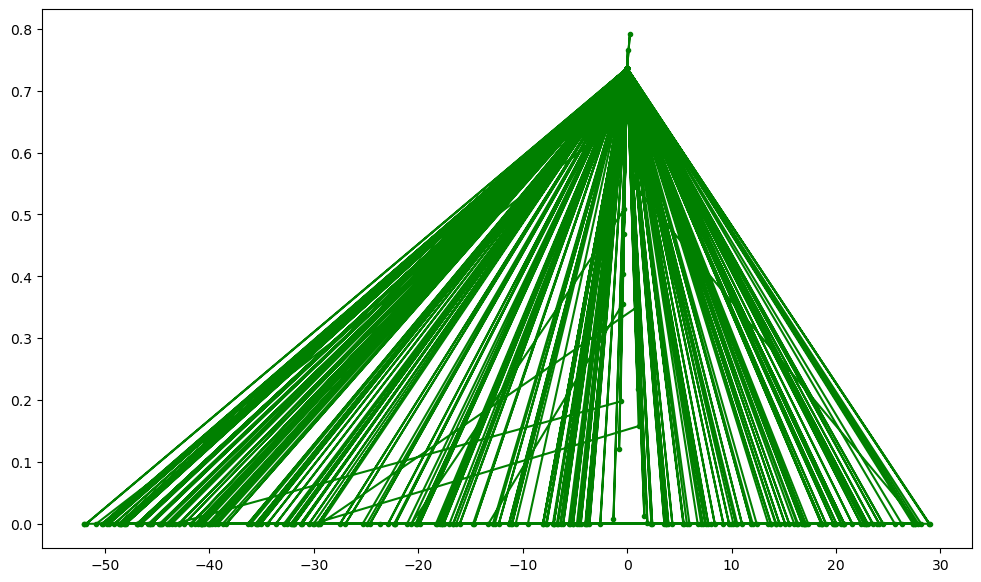

In [70]:
YY = np.zeros(1000)
for i in range(0, 1000):
    YY[i] = normal_dist(XX[i], mu, sigma)

plt.figure(figsize=(12, 7))
plt.plot(XX, YY, color='green', marker='.')
plt.show()